# Classification Model - Movie Review

## 4.1 Loading IMDB dataset

In [1]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


## 4.2 Multi-hot encoding

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [4]:
train = vectorize_sequences(train_data)
test = vectorize_sequences(test_data)
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (25000, 10000)
test shape: (25000, 10000)


In [5]:
label_train = np.asarray(train_labels).astype('float32')
label_test = np.asarray(test_labels).astype('float32')
print("label_train shape:", label_train.shape)
print("label_test shape:", label_test.shape)

label_train shape: (25000,)
label_test shape: (25000,)


## 4.4 Building your model

In [6]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

## 4.5 Compiling the model

In [7]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

2025-02-10 00:10:11.758093: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-10 00:10:11.758130: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-10 00:10:11.758145: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-02-10 00:10:11.758161: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-10 00:10:11.758171: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 4.6 검증세트 만들기

In [8]:
validation_set = train[:10000]
training_set = train[10000:]
validation_label = label_train[:10000]
training_label = label_train[10000:]

## 4.7 Training model

In [9]:
history = model.fit(
    training_set,
    training_label,
    epochs=20,
    batch_size=512,
    validation_data=(validation_set, validation_label),
)

Epoch 1/20


2025-02-10 00:10:12.866963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4967 - loss: 0.5038 - val_accuracy: 0.5901 - val_loss: 0.2542
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6831 - loss: 0.2107 - val_accuracy: 0.8133 - val_loss: 0.1518
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8568 - loss: 0.1286 - val_accuracy: 0.8166 - val_loss: 0.1489
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8772 - loss: 0.1138 - val_accuracy: 0.8591 - val_loss: 0.1316
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8928 - loss: 0.1128 - val_accuracy: 0.8497 - val_loss: 0.1393
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8950 - loss: 0.1087 - val_accuracy: 0.8539 - val_loss: 0.1319
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9088 - loss: 0.1009 - val_accuracy: 0.8649 - val_loss: 0.1277
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9140 - loss: 0.0988 - val_accuracy: 0.8644 - val_loss: 0.

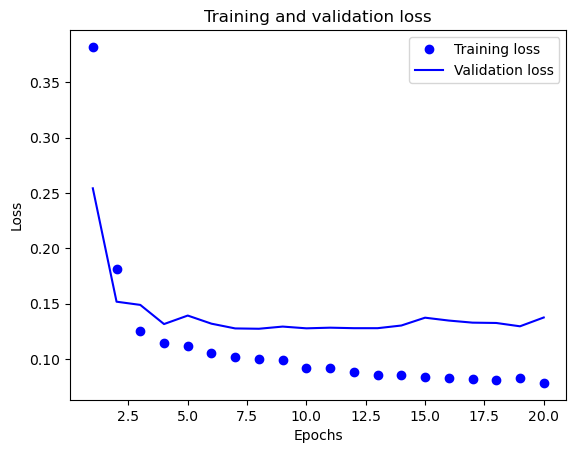

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

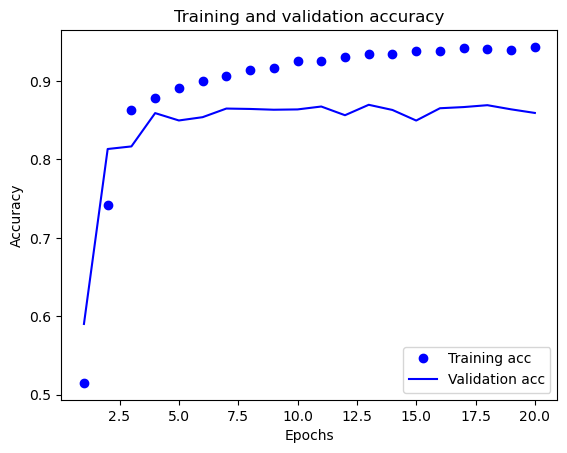

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()